# Importing the Required Libraries



In [5]:
# Data Analysis
import numpy as np
import pandas as pd

#Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Reducing Dimensionality using PCA
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [6]:
df=pd.read_csv("/content/drive/MyDrive/BIA Data Science/Bankruptcy Prediction.csv")

# Exploratory Data Analysis (EDA)

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
df.shape

(6819, 96)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [10]:
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan)',
       'Operating Profit Per Share (Yuan Â¥)',
       'Per Share Net profit before tax (Yuan Â¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [11]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Checking The Null Values

In [12]:
df.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

# Distribution of Target Variable

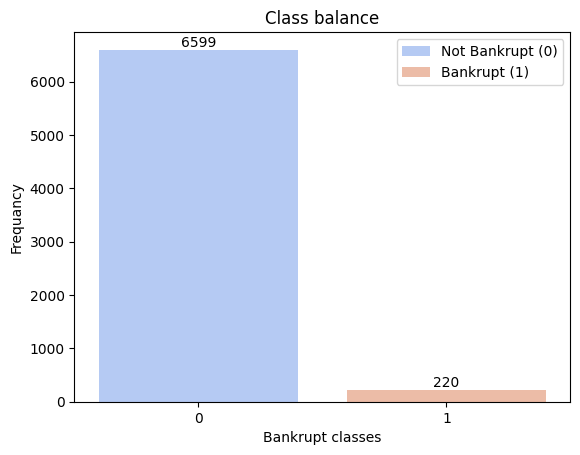

In [13]:
aa=sns.countplot(x="Bankrupt?",data=df, palette="coolwarm")
plt.legend(labels=['Not Bankrupt (0)', 'Bankrupt (1)'], loc='upper right')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");
for bars in aa.containers:
    aa.bar_label(bars)

###  Distributions of the " Net_Income_to_Total_Assets" column for both groups in the "bankrupt" column

In [14]:
df['Net Income to Total Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name: Net Income to Total Assets, dtype: float64

Text(0.5, 1.0, 'Distribution of Profit/ Net Income Ratio, by Class')

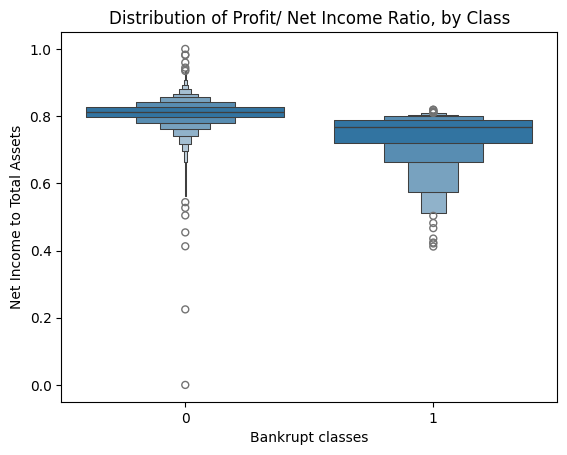

In [15]:
sns.boxenplot(x="Bankrupt?" , y="Net Income to Total Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class")

###  Created a histogram to check whether the distrbution is skewed significantly or not

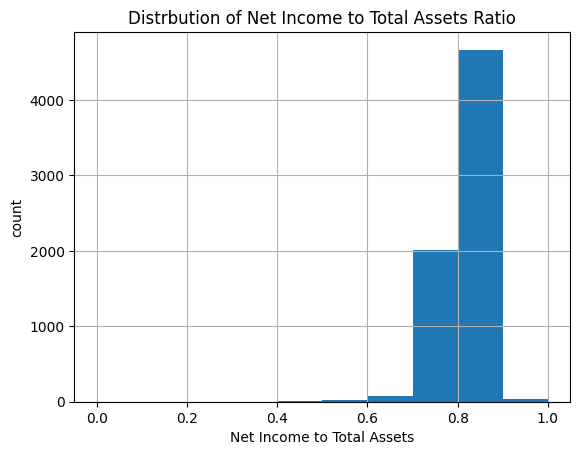

In [16]:
df["Net Income to Total Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

In [17]:
from scipy.stats import probplot
import warnings, gc
warnings.filterwarnings('ignore')
for col in df.drop('Bankrupt?',axis=1).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
df.corr()>0.8

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ROA(C) before interest and depreciation before interest,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
ROA(A) before interest and % after tax,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
ROA(B) before interest and depreciation after tax,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Operating Gross Margin,False,False,False,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Degree of Financial Leverage (DFL),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Interest Coverage Ratio (Interest expense to EBIT),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
Net Income Flag,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


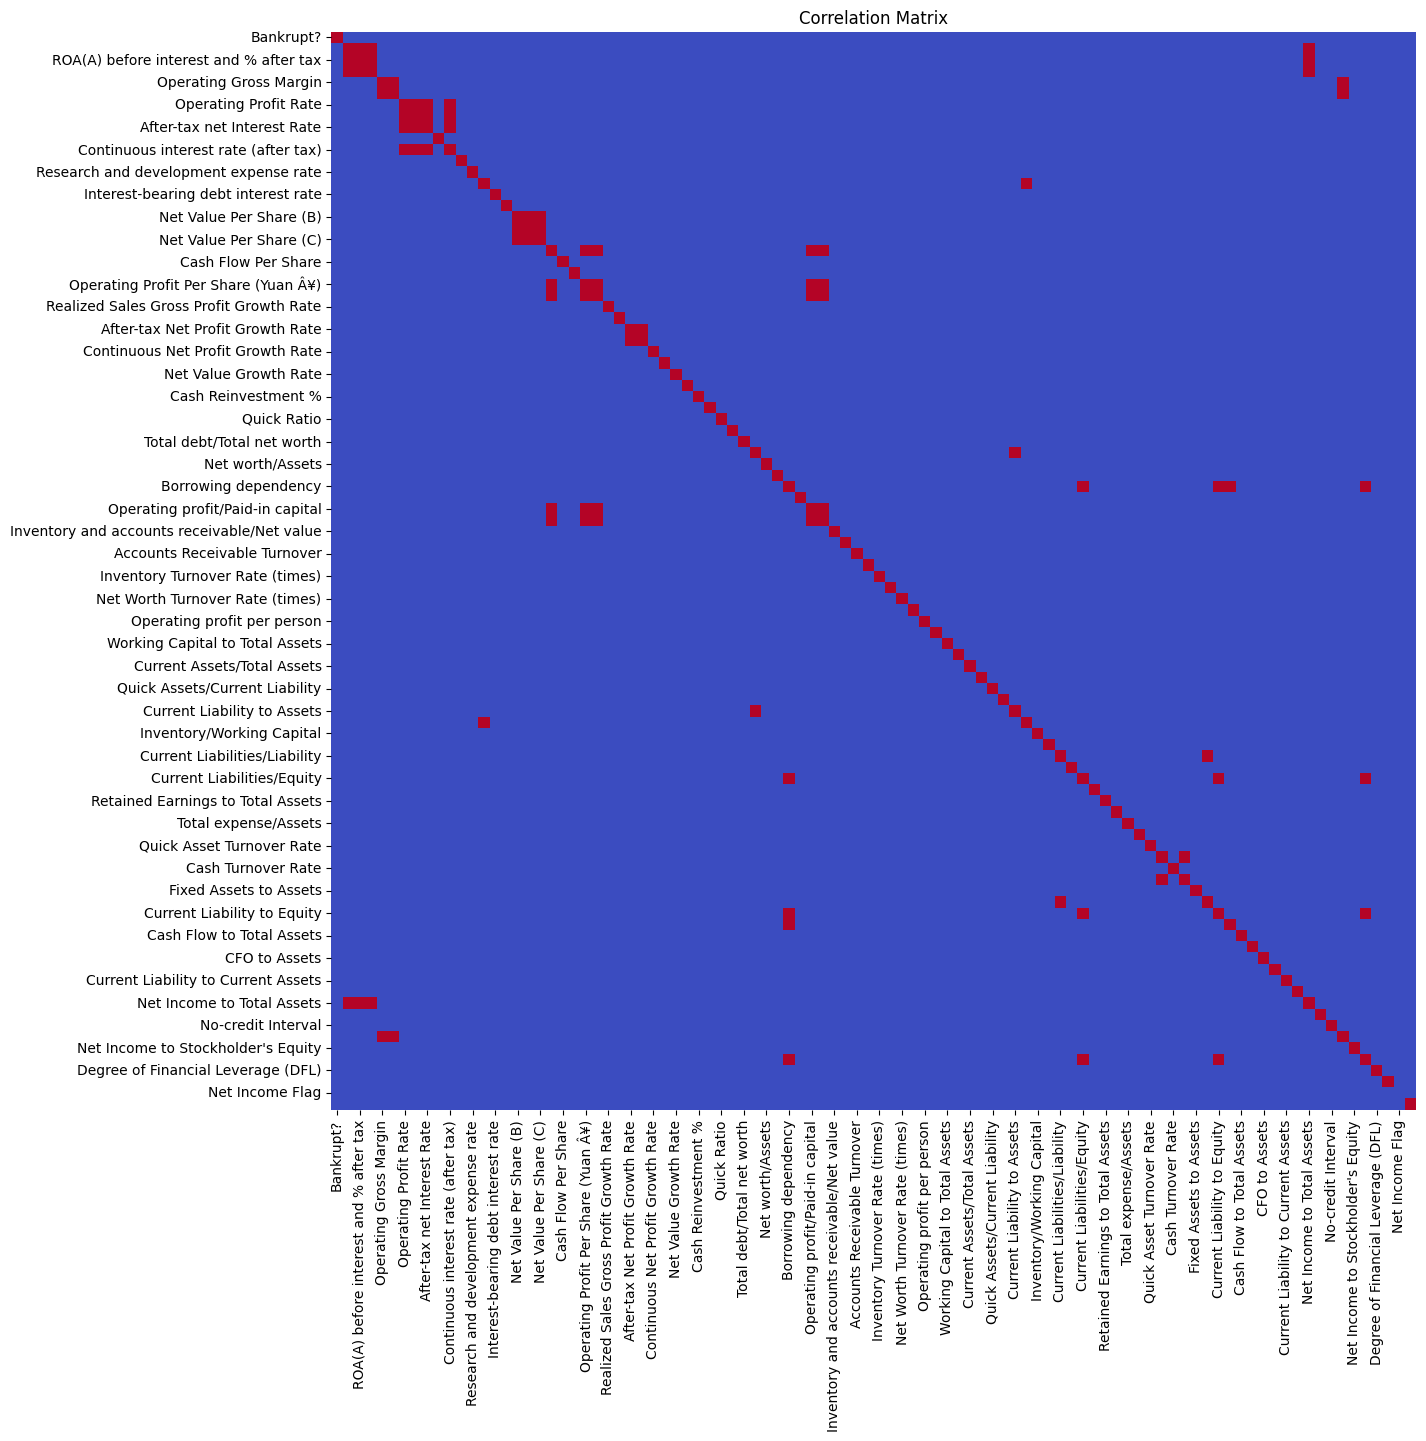

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr()>0.8, cmap="coolwarm", cbar=False)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [21]:
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and y
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [23]:
y_train

2490    0
6721    0
82      0
3960    0
2362    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: Bankrupt?, Length: 5455, dtype: int64

### Training Original Data

In [24]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Decision Tree": DecisionTreeClassifier(),
    "  Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                   Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Decision Tree trained.
  Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                   Random Forest trained.
                     Gradient Boosting trained.


In [25]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 96.48%
                  Decision Tree: 94.87%
  Support Vector Machine (Linear Kernel): 96.19%
   Support Vector Machine (RBF Kernel): 96.41%
                   Random Forest: 96.33%
                     Gradient Boosting: 96.26%


### Dimensionality Reduction (PCA)

In [26]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [27]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
2490,22.090946,-5.017001,13.003406,12.085888,-24.700257,-37.241368,-16.992495,31.293290,-1.510766,-1.419252
6721,1.445001,-0.610139,0.645512,-1.200011,0.901389,0.090249,1.250983,-1.427631,-0.679809,-0.762264
82,3.650889,-0.082286,-1.824113,0.452820,-0.241502,3.174728,-0.161440,-0.877460,0.776008,0.756062
3960,-1.581145,-2.027661,-0.677803,0.523183,2.123358,-0.970448,-1.781376,0.632927,1.120363,0.489860
2362,0.001823,1.493745,2.216185,-1.308510,-0.503162,0.692562,-1.335951,0.624969,-0.097041,-0.747585
...,...,...,...,...,...,...,...,...,...,...
905,0.578916,-0.523605,-0.116269,-0.486793,0.259068,-0.076246,0.914544,-1.005056,-0.590457,-0.560277
5192,-2.233934,3.574235,3.832495,-1.603845,-1.674674,-0.587433,1.090023,0.376593,0.462049,0.806011
3980,-5.580918,0.264465,1.273739,0.476674,1.950227,-1.320306,0.399496,0.291572,-2.727572,0.288766
235,7.550959,-0.033314,-0.708601,-0.669742,-0.283372,2.090399,-0.561821,-0.090892,-0.066414,0.331555


In [28]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

### Training the reduced data

In [29]:
reduced_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [30]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 95.97%
                         Decision Tree: 93.55%
Support Vector Machine (Linear Kernel): 96.26%
   Support Vector Machine (RBF Kernel): 96.41%
                         Random Forest: 96.19%
                     Gradient Boosting: 96.19%


### Performance change after PCA

In [31]:
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)

fig.show()

### Handling Data Imbalance

In [32]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_Operating Expense Rate'] = rob_scaler.fit_transform(df['Operating Expense Rate'].values.reshape(-1,1))
df['scaled_Research and development expense rate'] = rob_scaler.fit_transform(df['Research and development expense rate'].values.reshape(-1,1))
df['scaled_Interest-bearing debt interest rate'] = rob_scaler.fit_transform(df['Interest-bearing debt interest rate'].values.reshape(-1,1))
df['scale_Revenue Per Share (Yuan Ã‚Â¥)'] = rob_scaler.fit_transform(df['Revenue Per Share (Yuan)'].values.reshape(-1,1))
df['scaled_Total Asset Growth Rate'] = rob_scaler.fit_transform(df['Total Asset Growth Rate'].values.reshape(-1,1))
df['scaled_Net Value Growth Rate'] = rob_scaler.fit_transform(df['Net Value Growth Rate'].values.reshape(-1,1))
df['scaled_Current Ratio'] = rob_scaler.fit_transform(df['Current Ratio'].values.reshape(-1,1))
df['scaled_Quick Ratio'] = rob_scaler.fit_transform(df['Quick Ratio'].values.reshape(-1,1))
df['scaled_Total debt/Total net worth'] = rob_scaler.fit_transform(df['Total debt/Total net worth'].values.reshape(-1,1))
df['scaled_Accounts Receivable Turnover'] = rob_scaler.fit_transform(df['Accounts Receivable Turnover'].values.reshape(-1,1))
df['scaled_Average Collection Days'] = rob_scaler.fit_transform(df['Average Collection Days'].values.reshape(-1,1))
df['scaled_Inventory Turnover Rate (times)'] = rob_scaler.fit_transform(df['Inventory Turnover Rate (times)'].values.reshape(-1,1))
df['scaled_Fixed Assets Turnover Frequency'] = rob_scaler.fit_transform(df['Fixed Assets Turnover Frequency'].values.reshape(-1,1))
df['scaled_Revenue per person'] = rob_scaler.fit_transform(df['Revenue per person'].values.reshape(-1,1))
df['scaled_Allocation rate per person'] = rob_scaler.fit_transform(df['Allocation rate per person'].values.reshape(-1,1))
df['scaled_Quick Assets/Current Liability'] = rob_scaler.fit_transform(df['Quick Assets/Current Liability'].values.reshape(-1,1))
df['scaled_Cash/Current Liability'] = rob_scaler.fit_transform(df['Cash/Current Liability'].values.reshape(-1,1))
df['scaled_Inventory/Current Liability'] = rob_scaler.fit_transform(df['Inventory/Current Liability'].values.reshape(-1,1))
df['scaled_Long-term Liability to Current Assets'] = rob_scaler.fit_transform(df['Long-term Liability to Current Assets'].values.reshape(-1,1))
df['scaled_Current Asset Turnover Rate'] = rob_scaler.fit_transform(df['Current Asset Turnover Rate'].values.reshape(-1,1))
df['scaled_Quick Asset Turnover Rate'] = rob_scaler.fit_transform(df['Quick Asset Turnover Rate'].values.reshape(-1,1))
df['scaled_Cash Turnover Rate'] = rob_scaler.fit_transform(df['Cash Turnover Rate'].values.reshape(-1,1))
df['scaled_Fixed Assets to Assets'] = rob_scaler.fit_transform(df['Fixed Assets to Assets'].values.reshape(-1,1))
df['scaled_Total assets to GNP price'] = rob_scaler.fit_transform(df['Total assets to GNP price'].values.reshape(-1,1))


df.drop(['Operating Expense Rate','Research and development expense rate','Interest-bearing debt interest rate','Revenue Per Share (Yuan)',
         'Total Asset Growth Rate','Net Value Growth Rate','Current Ratio','Quick Ratio','Total debt/Total net worth','Accounts Receivable Turnover',
         'Average Collection Days','Inventory Turnover Rate (times)','Fixed Assets Turnover Frequency','Revenue per person',
         'Allocation rate per person','Quick Assets/Current Liability','Cash/Current Liability','Inventory/Current Liability',
         'Long-term Liability to Current Assets','Current Asset Turnover Rate','Quick Asset Turnover Rate','Cash Turnover Rate',
         'Fixed Assets to Assets','Total assets to GNP price'], axis=1, inplace=True)

In [33]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

print('No Bankrupt', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Bankrupt', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Bankrupt 96.77 % of the dataset
Bankrupt 3.23 % of the dataset
Train: [1104 1118 1132 ... 6816 6817 6818] Test: [   0    1    2 ... 1383 1384 1385]
Train: [   0    1    2 ... 6816 6817 6818] Test: [1104 1118 1132 ... 2796 2797 2798]
Train: [   0    1    2 ... 6816 6817 6818] Test: [1860 1861 1862 ... 4136 4137 4138]
Train: [   0    1    2 ... 6816 6817 6818] Test: [2100 2147 2148 ... 5475 5476 5477]
Train: [   0    1    2 ... 5475 5476 5477] Test: [3749 3908 4071 ... 6816 6817 6818]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.96774194 0.03225806]
[0.96771827 0.03228173]


### Undersampling

In [34]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
bankrupt_df = df.loc[df['Bankrupt?'] == 1]
non_bankrupt_df = df.loc[df['Bankrupt?'] == 0][:220]

normal_distributed_df = pd.concat([bankrupt_df, non_bankrupt_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,scaled_Allocation rate per person,scaled_Quick Assets/Current Liability,scaled_Cash/Current Liability,scaled_Inventory/Current Liability,scaled_Long-term Liability to Current Assets,scaled_Current Asset Turnover Rate,scaled_Quick Asset Turnover Rate,scaled_Cash Turnover Rate,scaled_Fixed Assets to Assets,scaled_Total assets to GNP price
4555,0,0.552381,0.610554,0.599979,0.604686,0.604628,0.999095,0.797546,0.809439,0.303534,...,-0.441789,0.336996,-0.158285,0.082754,0.189380,-0.073271,-1.539163e-14,0.700665,-0.196318,1.325853
2099,1,0.353678,0.401984,0.393918,0.586373,0.586373,0.998692,0.796095,0.808086,0.301843,...,1.809085,-0.976185,-0.429205,1.118464,0.258219,1.453118,9.816327e-01,0.294900,-0.298029,0.964299
6184,0,0.538683,0.590493,0.577708,0.608772,0.609096,0.999017,0.797667,0.809512,0.303909,...,-0.162527,0.621059,0.224800,-0.685293,-0.069931,-0.085676,-8.970612e-15,1.911308,-0.291912,-0.196168
5744,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,0.303582,...,0.235721,0.670031,0.650337,0.121079,0.971108,-0.063824,-1.377857e-14,-0.239468,0.276342,0.901679
6265,0,0.469361,0.520225,0.517587,0.595310,0.595634,0.998973,0.797310,0.809246,0.303378,...,1.006908,0.139283,-0.019656,0.976563,1.072745,0.151653,-1.319122e-14,1.485588,0.188505,-0.062516


##  Equally Distributing and Correlating:
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Bankrupt?, dtype: float64
0    220
1    220
Name: Bankrupt?, dtype: int64


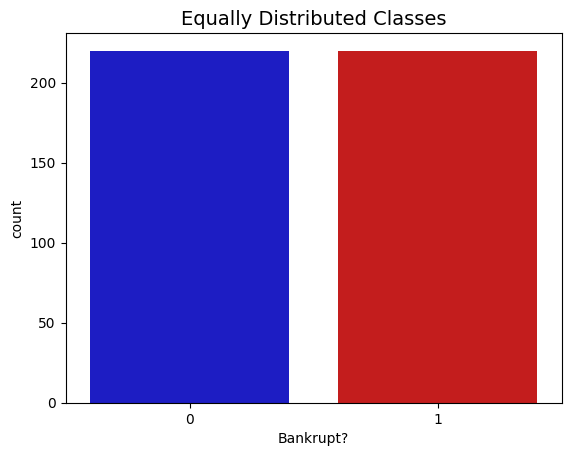

In [35]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Bankrupt?'].value_counts()/len(new_df))
print(new_df['Bankrupt?'].value_counts())

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Bankrupt?', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

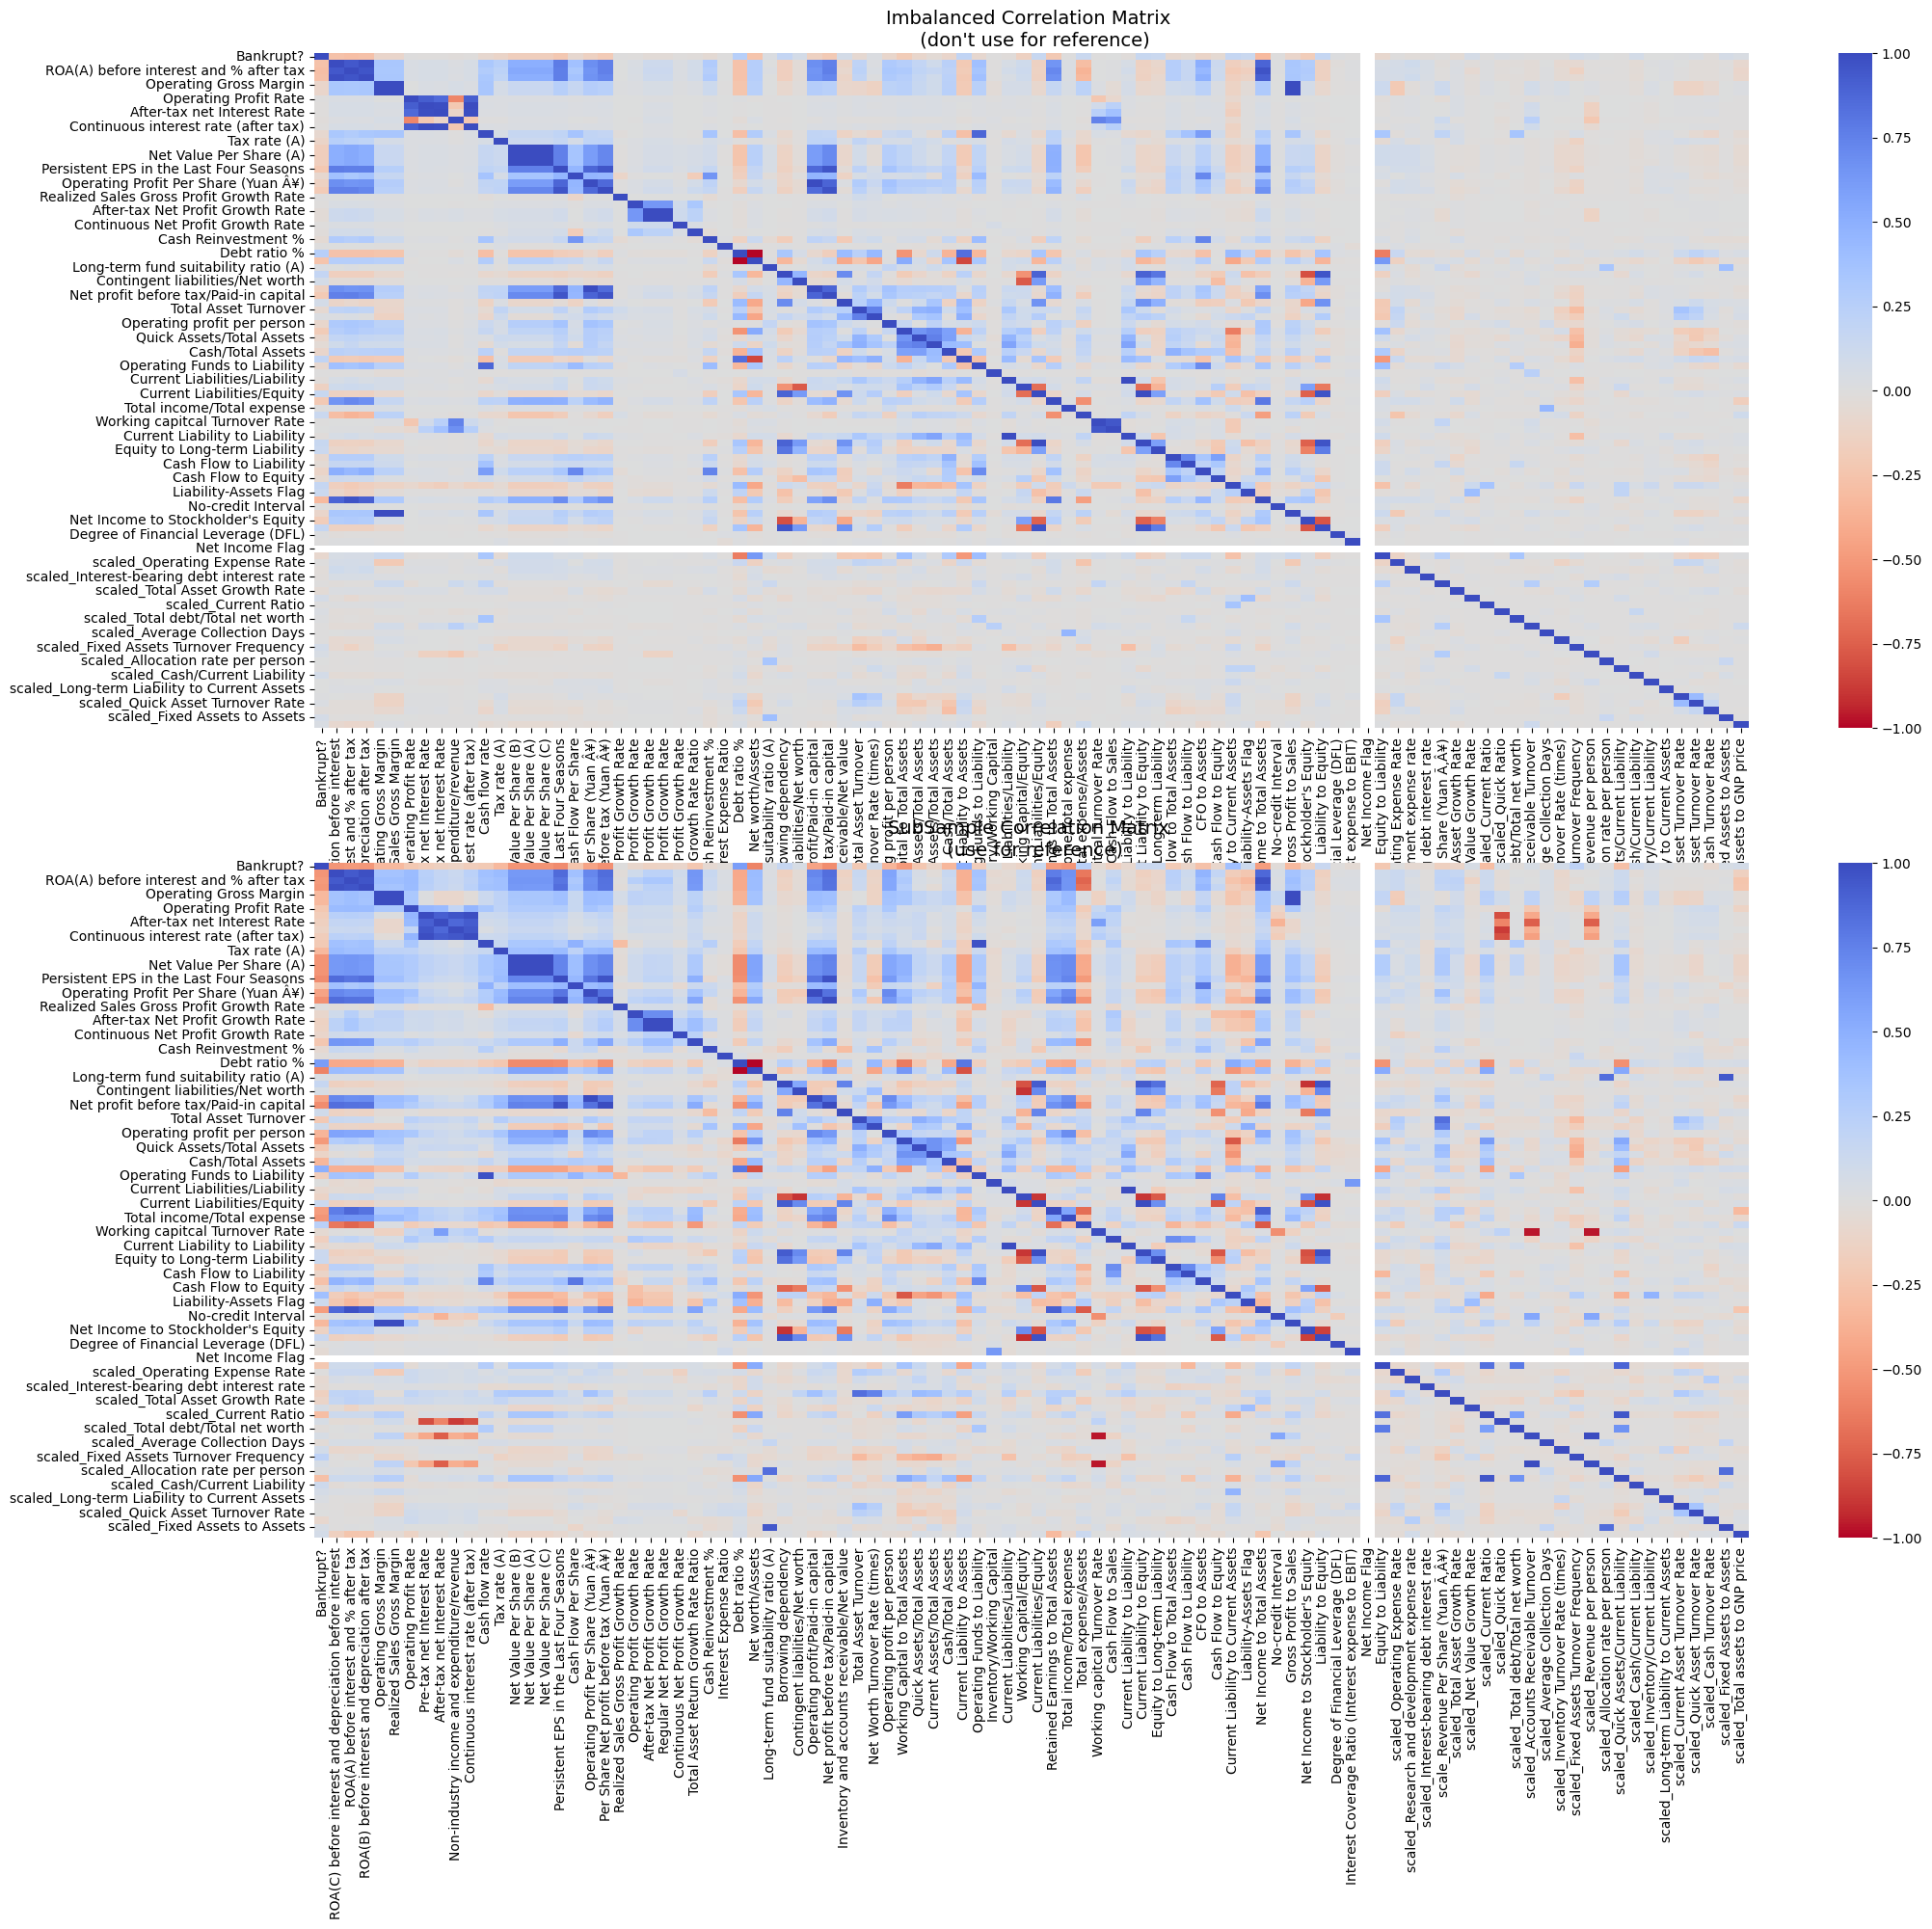

In [36]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = preprocess_inputs(new_df)

In [38]:
print(X_train.shape)
print(X_test.shape)

(352, 95)
(88, 95)


### Training Undersample Data

In [39]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Decision Tree": DecisionTreeClassifier(),
    "  Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                   Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                  Decision Tree trained.
  Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                   Random Forest trained.
                     Gradient Boosting trained.


In [40]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 79.55%
                  Decision Tree: 77.27%
  Support Vector Machine (Linear Kernel): 79.55%
   Support Vector Machine (RBF Kernel): 81.82%
                   Random Forest: 84.09%
                     Gradient Boosting: 87.50%


### Oversampling

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
# Resample or oversample the X --> X_train_os, y --> y_train_os
X_train_os,y_train_os=sm.fit_resample(X,y)

In [42]:
y_train_os.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

### Training Oversample Data

In [43]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                  Decision Tree": DecisionTreeClassifier(),
    "  Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                   Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train_os, y_train_os)
    print(name + " trained.")

                   Logistic Regression trained.
                  Decision Tree trained.
  Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                   Random Forest trained.
                     Gradient Boosting trained.


In [44]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 71.59%
                  Decision Tree: 43.18%
  Support Vector Machine (Linear Kernel): 87.50%
   Support Vector Machine (RBF Kernel): 44.32%
                   Random Forest: 44.32%
                     Gradient Boosting: 44.32%


In [45]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train_os)

X_train_reduced = pd.DataFrame(pca.transform(X_train_os), index=X_train_os.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [46]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.885826e+12,-2.224713e+11,-4.159189e+11,-1.270580e+10,-3.503018e+10,-8.628792e+09,-8.119092e+09,-7.756656e+09,-7.419261e+09,-2.598121e+09
1,-4.168180e+12,-1.451025e+11,-2.063313e+11,-1.318167e+10,-3.273962e+10,-8.637306e+09,-9.416731e+09,-7.554410e+09,-7.232842e+09,-2.589754e+09
2,-4.168247e+12,-1.375128e+11,3.594876e+11,-9.536315e+09,-2.655937e+10,-1.351590e+10,4.684998e+11,1.024908e+11,1.715657e+10,-2.236853e+10
3,2.233522e+13,-9.772932e+11,2.266229e+12,8.468947e+09,1.203541e+10,5.095961e+09,-6.247265e+09,-1.184271e+10,4.621941e+09,2.476208e+09
4,1.758120e+13,-8.581696e+11,-4.104609e+11,-2.753910e+09,-2.848254e+10,-3.573262e+09,-1.399781e+09,-1.019060e+10,-3.885630e+09,-7.825356e+08
...,...,...,...,...,...,...,...,...,...,...
13193,-4.168212e+12,-1.479397e+11,-4.165589e+11,-1.387260e+10,-3.579785e+10,-9.221521e+09,-8.906888e+09,-7.471291e+09,-7.833557e+09,-2.810986e+09
13194,-4.168212e+12,-1.479397e+11,-4.165589e+11,-1.387260e+10,-3.579785e+10,-9.221521e+09,-8.906888e+09,-7.471291e+09,-7.833557e+09,-2.810986e+09
13195,-4.168212e+12,-1.479397e+11,-4.165589e+11,-1.387260e+10,-3.579785e+10,-9.221521e+09,-8.906888e+09,-7.471291e+09,-7.833557e+09,-2.810986e+09
13196,2.255752e+13,-1.020672e+12,-4.090656e+11,-2.099274e+08,-2.680878e+10,-2.280927e+09,3.178632e+08,-1.081279e+10,-2.982335e+09,-3.184212e+08


In [47]:
fig = px.bar(
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()

In [48]:
reduced_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train_os)
    print(name + " trained.")

                   Logistic Regression trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [49]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 45.45%
                         Decision Tree: 45.45%
Support Vector Machine (Linear Kernel): 44.32%
   Support Vector Machine (RBF Kernel): 44.32%
                         Random Forest: 44.32%
                     Gradient Boosting: 45.45%


### Conclusion

Based on the results obtained, it can be concluded that the Random Forest has the best performance with an accuracy of 96.55%.

The other models such as Logistic Regression and Gradient Boosting perform well with same accuracy of 96.48%.

Support Vector Machine (Linear kernel) and Support vector machine (RBF Kernel) also perform well with an accuracy of 96.19% and 96.41%.

The Decision Tree model performs comparatively poorly with an accuracy of 95.16%.

These results demonstrate the effectiveness of using machine learning algorithms for the task of bankruptcy prediction.

